# Reto: Don Colchon

> Daniel Felipe Triviño Santana - A01763423\
> Roberto Priego Bautista - A01285539\
> Luis Fernando Alzázar Díaz - A00836287\
> Joana Itzel Barreto López - A01425283


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd

MessageError: Error: credential propagation was unsuccessful

## Problematica

El socio formador Don Colchon se presentó en el Tecnologico de Monterrey buscando una asesoria, debido a que cuentan con la siguiente problemática:

- Exceso de ventas sin poder cubrir la demanda requirida
- Exceso de inventario

Don Colchon cuenta con un sistema lineal y manual en Excel para pronosticar sus ventas a lo largo del año. Este procedimiento tiende a tener una baja exactitud y precisión en las predicciones.


## Datos Proporcionados

Se realizó una etapa de preprocesamiento y entendimiento de los datos para obtener tablas facilmente utilizables y codificables para distintos modelos de regresión.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/4to semestre/Dataframes (Analisis de Ciencia de Datos)/experimental_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47315 entries, 0 to 47314
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        47315 non-null  object 
 1   Location    47315 non-null  object 
 2   Product     47315 non-null  object 
 3   Amount      47315 non-null  float64
 4   Unit_price  47315 non-null  float64
 5   Is_holiday  47315 non-null  int64  
 6   Weekday     47315 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.5+ MB


,Date,Location,Product,Amount,Unit_price,Is_holiday,Weekday
0,2022-01-02,Monterrey,Producto 11,7.0,5780.21,0,Sunday
1,2022-01-02,San Luis,Producto 11,3.5,5189.18,0,Sunday
2,2022-01-02,Queretaro,Producto 6,3.5,6707.84,0,Sunday
3,2022-01-02,Monterrey,Producto 24,3.5,8881.00,0,Sunday
4,2022-01-02,Monterrey,Producto 15,7.0,6120.86,0,Sunday


Las columnas Unit_price, Weekday, Is_holiday u Unit_price fueron agregadas como datos exógenos que pueden llegar a mejorar los resultados de nuestros modelos.

Se reemplaza la columna Total antes de impuestos por unit price y se elimina la primera. La razón de esto es que el total antes de impuestos es la variable objetivo multiplicada por un factor, lo que la hace inviable como varaiable independiente.  

In [ ]:
df_2 = pd.read_csv('/content/gdrive/MyDrive/4to semestre/Dataframes (Analisis de Ciencia de Datos)/sales_x_date.csv')
df_2

,Amount,Unit_price,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Is_holiday,Date,Sale
0,255.5,7384.625616,0,0,0,0,0,0,1,0,2022-01-02,0
1,238.0,6150.141765,1,0,0,0,0,0,0,0,2022-01-03,0
2,364.0,6220.821538,0,1,0,0,0,0,0,0,2022-01-04,0
3,273.0,6824.337692,0,0,1,0,0,0,0,0,2022-01-05,0
4,182.0,8041.052308,0,0,0,1,0,0,0,1,2022-01-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
724,630.0,6271.283056,0,0,1,0,0,0,0,0,2023-12-27,0
725,651.0,6455.933710,0,0,0,1,0,0,0,0,2023-12-28,0
726,581.0,7220.616084,0,0,0,0,1,0,0,0,2023-12-29,0
727,721.0,6803.676602,0,0,0,0,0,1,0,0,2023-12-30,0


# Tecnicas de forecasting.

## Tecnicas utilizadas

+ Regresión lineal
+ Random Forest
+ ARMAX

## Tecnicas descartadas

+ SARIMA
+ PROPHET
+ LSTM
+ RNN
+ DT Regressor

# Resultados.

## RandomForest v.1 (Roberto)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

> Convertir Date a datetime64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47315 entries, 0 to 47314
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        47315 non-null  datetime64[ns]
 1   Location    47315 non-null  object        
 2   Product     47315 non-null  object        
 3   Amount      47315 non-null  float64       
 4   Unit_price  47315 non-null  float64       
 5   Is_holiday  47315 non-null  int64         
 6   Weekday     47315 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.5+ MB


### Nota. Datos Hexogenos adicionales

Al saber que el Buen Fin y Hot Sale son aquellos datos que mas marcan un outlier demasiado marcado, podemos crear datos exogenos que nos permitan demostrar la importancia de estas fechas y en cierta forma decirle al modelo que aqui los datos tienen un gran peso.

In [ ]:
fechas_importantes:dict[tuple[str, str]] = {
    "Buen Fin 2022": ('2022-11-18','2022-11-21'),
    "Buen Fin 2023": ('2023-11-17','2023-11-20'),
    "Hot Sale 2022": ('2022-05-23','2022-05-31'),
    "Hot Sale 2023": ('2023-05-29','2023-06-06'),
    # "Blue Monday 2022": ('2022-01-17','2022-01-17'),
    # "Blue Monday 2023": ('2023-01-16','2023-01-16'),
}

In [ ]:
df["Sale"] = 0
for start, end in fechas_importantes.values():
    df.loc[df["Date"].between(start, end), "Sale"] = 1
df.loc[df["Sale"] == 1]
df.sort_values("Date", inplace=True)

Al tener datos como objetos, estos datos no son manejados por un RandomForest por lo que tendremos que usar un Encoder que nos permita categorizar los datos por numeros.

Ejemplo:

> [ ['Monday'], ['Thuesday'], ['Wednesday'], ['Thursday'], ['Friday'], ['Saturday'], ['Sunday'] ] = **[ ['0'], ['1'], ['2'], ['3'], ['4'], ['5'], ['6'] ]**

In [ ]:
le = LabelEncoder()
df['Product'] = le.fit_transform(df['Product'])
df['Location'] = le.fit_transform(df['Location'])
df['Weekday'] = le.fit_transform(df['Weekday'])
df

,Date,Location,Product,Amount,Unit_price,Is_holiday,Weekday,Sale
0,2022-01-02,5,13,7.0,5780.210,0,3,0
27,2022-01-02,4,188,3.5,8579.930,0,3,0
28,2022-01-02,5,200,3.5,8063.590,0,3,0
29,2022-01-02,5,234,3.5,6654.310,0,3,0
30,2022-01-02,1,1,7.0,1837.025,0,3,0
...,...,...,...,...,...,...,...,...
40162,2023-12-31,5,192,3.5,6069.070,0,3,0
40163,2023-12-31,9,192,7.0,6070.110,0,3,0
40164,2023-12-31,5,192,3.5,1137.070,0,3,0
40166,2023-12-31,9,1,3.5,1464.610,0,3,0


In [ ]:
df.set_index('Date', inplace=True)
df

,Location,Product,Amount,Unit_price,Is_holiday,Weekday,Sale
Date,,,,,,,
2022-01-02,5,13,7.0,5780.210,0,3,0
2022-01-02,4,188,3.5,8579.930,0,3,0
2022-01-02,5,200,3.5,8063.590,0,3,0
2022-01-02,5,234,3.5,6654.310,0,3,0
2022-01-02,1,1,7.0,1837.025,0,3,0
...,...,...,...,...,...,...,...
2023-12-31,5,192,3.5,6069.070,0,3,0
2023-12-31,9,192,7.0,6070.110,0,3,0
2023-12-31,5,192,3.5,1137.070,0,3,0


### Nota. Distribucion de datos y configuración del modelo

Por comodidad, he decidido trabajar con una distribución de datos:

> - 80% training
> - 20% testing
> - shuffle=False (esto permite que el modelo logre detectar estos patrones de temporalidad y para los ultimos datos, poder hacer un mejor pronostico)

Por otro lado, los parametro que se utilizaron fueron:

> - n_estimators, genera el numero de arboles que hay en el modelo, si agrego muchos podria generar overfitting.

> - random_state = 42, es una seed para que cualquiera que corra el modelo, los resultados sean reproducibles.

In [ ]:
X = df[['Product', 'Location', 'Is_holiday', 'Unit_price', 'Weekday', 'Sale']]
y = df['Amount']

Generamos el R^2 y el Mean Square Error, estas metricas nos permitiran verificar que tan eficiente es el modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state = 42)
rf_regressor.fit(X_train, y_train)

#MSE
predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Error cuadrático medio:", mse)

# Calcular R^2 para los datos de prueba
r2_test = rf_regressor.score(X_test, y_test)
print("R^2 para los datos de prueba:", r2_test)

Error cuadrático medio: 14.696324591949065
R^2 para los datos de prueba: 0.7369582102188507


### Resultados R^2 y MSE

Los resultados son batante positivos, considerando que el R^2 se encuentra por arriba del 40% que ellos tienen a la hora de verificar su efectividad, es un gran avance.

### ANOVA Table


In [ ]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

data = pd.concat([X_train, y_train], axis=1)
model = smf.ols('Amount ~ Product + Location + Is_holiday + Unit_price + Weekday + Sale', data=data).fit()
anova_table = anova_lm(model)

anova_table


,df,sum_sq,mean_sq,F,PR(>F)
Product,1.0,2.793266e+04,27932.656144,598.937780,2.996870e-131
Location,1.0,1.405758e+03,1405.757971,30.142553,4.039997e-08
Is_holiday,1.0,2.200620e+03,2200.620317,47.186155,6.555098e-12
Unit_price,1.0,1.774617e+04,17746.166769,380.516972,2.495813e-84
Weekday,1.0,4.076870e+01,40.768702,0.874171,3.498092e-01
Sale,1.0,1.593778e+04,15937.784195,341.741259,5.763081e-76
Residual,37845.0,1.764977e+06,46.636992,NaN,NaN


### Grafico. Comparación de valores reales y predicciones

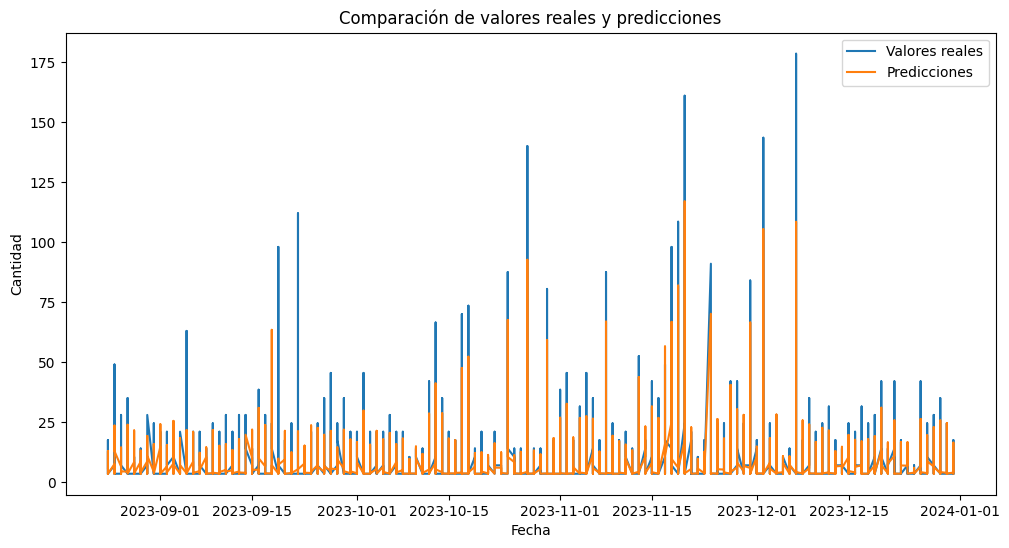

In [ ]:
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
plt.plot(y_test.index, y_test.values, label='Valores reales')
plt.plot(y_test.index, predictions, label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Comparación de valores reales y predicciones')
plt.legend()
plt.show()

### Normalidad de los errores

La forma mas comoda que encontre para hacerla fue usando la prueba de Shapiro-Wilk test:

H_0: Los residuos tienen una distribución normal.

H_1: Los residuos no tienen una distribución normal


In [ ]:
from scipy.stats import shapiro
residuals = model.resid
stat, p_value = shapiro(residuals)

print("Estadístico de prueba:", stat)
print("Valor p:", p_value)

Estadístico de prueba: 0.3917842507362366
Valor p: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Podemos concluir que los residuos no siguen una distribución normal.

Esto si bien es malo, esto simplemente representa que el modelo no es perfecto y no es perfecto, esto lo verificamos con una QQ-Plot de los errores.

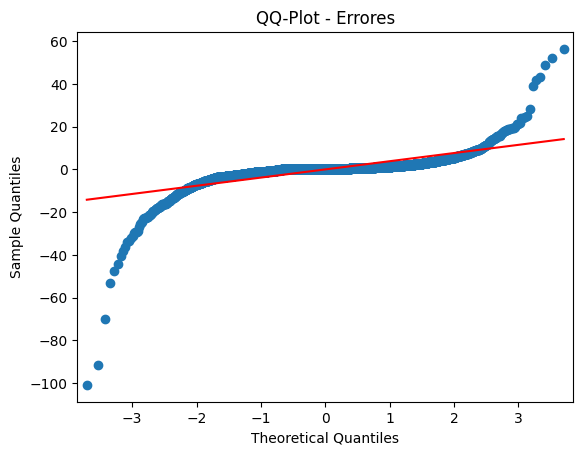

In [ ]:
qqplot(predictions - y_test, line='s')
plt.title('QQ-Plot - Errores')
plt.show()


Todos los datos que no siguen la distribución normal son outliers de los datos, datos que son basura, lo que genera que el modelo no sea perfecto.

### Independencia de los errores

Aqui podemos analizar si existe una coorelación entre los residuos. Para esta prueba tenemos las siguientes metricas:

> **< 2**, Coorelación positiva de entre los residuos

> **> 2**, Coorelación negativa entre los residuos

> = 2, Ideal

In [ ]:
from statsmodels.stats.stattools import durbin_watson

stat = durbin_watson(residuals)
print("Estadístico de prueba:", stat)

Estadístico de prueba: 1.924892819301856


Podemos concluir que la coorelación es casi ideal, esto nos dice que los residuos deberian de ser independientes entre si.

## Logistic Regression (Luis)

## Linear Regression (Daniel)

## SARIMAX (Daniel)